In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading The Dataset

In [2]:
dataset = pd.read_csv("telesurgery_cybersecurity_dataset.csv")
dataset

,Robot Gesture ID,Gesture Type,"Gesture Coordinates (x, y, z)",Timestamp,Gesture Duration (sec),Robot Status,Message ID,Sender,Receiver,Encryption Algorithm Used,Encryption Status,Network Latency (ms),Data Transfer Rate (Mbps),Threat Type,Threat Severity,Response Time (sec),Response Action Taken,Threat Detected
0,10,Incision,"(1.48, 1.4, 0.02)",2025-02-14 16:32:27,4.37,Idle,22614,Operator,Robot,Two Fish,Encrypted,11,97,Man-in-the-Middle Attack,Low,4.63,Reset Encryption,1
1,8,Diagnosis,"(1.62, 1.81, 0.68)",2025-02-14 16:32:27,3.08,Idle,61556,Operator,Robot,Two Fish,Encrypted,9,88,DoS Attack,Low,3.94,Reset Encryption,1
2,9,Incision,"(0.67, 1.53, 0.06)",2025-02-14 16:32:27,1.11,Active,27848,Operator,Robot,Two Fish,Encrypted,7,26,No Threat,Low,0.00,NaN,0
3,1,Incision,"(1.63, 1.74, 1.92)",2025-02-14 16:32:27,2.72,Idle,60592,Operator,Robot,Two Fish,Encrypted,13,56,Data Breach,High,4.58,Reconnect Connection,1
4,4,Suturing,"(0.53, 0.87, 1.17)",2025-02-14 16:32:27,1.20,Idle,46712,Robot,Operator,Two Fish,Failed,5,41,Man-in-the-Middle Attack,Low,2.46,Isolate Data,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,Diagnosis,"(0.48, 1.06, 0.4)",2025-02-14 16:32:27,1.39,Idle,10047,Operator,Robot,Two Fish,Encrypted,7,41,Man-in-the-Middle Attack,High,3.47,Reconnect Connection,1
996,9,Navigation,"(1.81, 0.37, 0.3)",2025-02-14 16:32:27,2.11,Idle,66498,Operator,Robot,Two Fish,Failed,14,26,Data Breach,Medium,3.89,Isolate Data,1
997,9,Navigation,"(1.05, 1.83, 0.49)",2025-02-14 16:32:27,2.09,Idle,69106,Operator,Robot,Two Fish,Failed,8,20,Man-in-the-Middle Attack,High,1.83,Reconnect Connection,1
998,1,Navigation,"(1.56, 0.67, 1.91)",2025-02-14 16:32:27,1.01,Idle,94269,Robot,Operator,Two Fish,Encrypted,8,14,No Threat,Medium,0.00,NaN,0


## Exploring Dataset

In [3]:
dataset.head(50)

,Robot Gesture ID,Gesture Type,"Gesture Coordinates (x, y, z)",Timestamp,Gesture Duration (sec),Robot Status,Message ID,Sender,Receiver,Encryption Algorithm Used,Encryption Status,Network Latency (ms),Data Transfer Rate (Mbps),Threat Type,Threat Severity,Response Time (sec),Response Action Taken,Threat Detected
0,10,Incision,"(1.48, 1.4, 0.02)",2025-02-14 16:32:27,4.37,Idle,22614,Operator,Robot,Two Fish,Encrypted,11,97,Man-in-the-Middle Attack,Low,4.63,Reset Encryption,1
1,8,Diagnosis,"(1.62, 1.81, 0.68)",2025-02-14 16:32:27,3.08,Idle,61556,Operator,Robot,Two Fish,Encrypted,9,88,DoS Attack,Low,3.94,Reset Encryption,1
2,9,Incision,"(0.67, 1.53, 0.06)",2025-02-14 16:32:27,1.11,Active,27848,Operator,Robot,Two Fish,Encrypted,7,26,No Threat,Low,0.00,NaN,0
3,1,Incision,"(1.63, 1.74, 1.92)",2025-02-14 16:32:27,2.72,Idle,60592,Operator,Robot,Two Fish,Encrypted,13,56,Data Breach,High,4.58,Reconnect Connection,1
4,4,Suturing,"(0.53, 0.87, 1.17)",2025-02-14 16:32:27,1.20,Idle,46712,Robot,Operator,Two Fish,Failed,5,41,Man-in-the-Middle Attack,Low,2.46,Isolate Data,1
5,5,Incision,"(0.58, 1.17, 0.16)",2025-02-14 16:32:27,1.32,Idle,68120,Robot,Operator,Two Fish,Encrypted,12,92,No Threat,High,0.00,NaN,0
6,8,Incision,"(0.74, 0.97, 0.73)",2025-02-14 16:32:27,4.84,Active,94486,Operator,Robot,Two Fish,Encrypted,10,46,No Threat,Low,0.00,NaN,0
7,2,Incision,"(1.76, 1.11, 1.71)",2025-02-14 16:32:27,3.65,Active,70603,Robot,Operator,Two Fish,Failed,8,36,DoS Attack,High,2.20,Reset Encryption,1
8,9,Incision,"(1.04, 1.71, 0.37)",2025-02-14 16:32:27,1.64,Active,54038,Operator,Robot,Two Fish,Failed,10,75,DoS Attack,Medium,2.18,Reconnect Connection,1
9,10,Incision,"(1.84, 0.95, 1.17)",2025-02-14 16:32:27,4.25,Active,70590,Robot,Operator,Two Fish,Encrypted,7,41,Data Breach,Low,4.92,Reset Encryption,1


In [4]:
dataset.tail(50)

,Robot Gesture ID,Gesture Type,"Gesture Coordinates (x, y, z)",Timestamp,Gesture Duration (sec),Robot Status,Message ID,Sender,Receiver,Encryption Algorithm Used,Encryption Status,Network Latency (ms),Data Transfer Rate (Mbps),Threat Type,Threat Severity,Response Time (sec),Response Action Taken,Threat Detected
950,5,Diagnosis,"(0.29, 1.69, 1.83)",2025-02-14 16:32:27,3.55,Idle,53140,Operator,Robot,Two Fish,Encrypted,17,28,Man-in-the-Middle Attack,High,2.76,Reconnect Connection,1
951,10,Suturing,"(1.19, 0.71, 0.61)",2025-02-14 16:32:27,1.41,Active,20249,Operator,Robot,Two Fish,Encrypted,9,13,No Threat,High,0.00,NaN,0
952,4,Cleaning,"(0.23, 1.88, 1.27)",2025-02-14 16:32:27,1.34,Idle,72314,Operator,Robot,Two Fish,Failed,5,69,Data Breach,Medium,4.85,Reset Encryption,1
953,6,Incision,"(0.13, 1.31, 0.29)",2025-02-14 16:32:27,3.04,Active,97658,Robot,Operator,Two Fish,Failed,5,72,Man-in-the-Middle Attack,Medium,1.85,Reconnect Connection,1
954,4,Cleaning,"(0.09, 0.56, 1.66)",2025-02-14 16:32:27,4.37,Active,34677,Robot,Operator,Two Fish,Failed,5,42,DoS Attack,High,3.41,Reconnect Connection,1
955,2,Cleaning,"(0.23, 0.23, 0.91)",2025-02-14 16:32:27,4.49,Idle,25437,Robot,Operator,Two Fish,Encrypted,14,16,Man-in-the-Middle Attack,Low,1.56,Isolate Data,1
956,2,Diagnosis,"(1.12, 0.57, 1.58)",2025-02-14 16:32:27,1.56,Active,50936,Robot,Operator,Two Fish,Failed,13,66,Data Breach,Low,1.33,Isolate Data,1
957,3,Incision,"(1.76, 1.38, 0.85)",2025-02-14 16:32:27,2.46,Active,16919,Operator,Robot,Two Fish,Failed,6,28,DoS Attack,High,4.93,Reconnect Connection,1
958,1,Suturing,"(0.12, 1.91, 0.25)",2025-02-14 16:32:27,3.13,Idle,77375,Robot,Operator,Two Fish,Encrypted,14,38,DoS Attack,High,1.63,Isolate Data,1
959,2,Incision,"(1.08, 1.91, 0.18)",2025-02-14 16:32:27,3.08,Active,39576,Operator,Robot,Two Fish,Encrypted,11,89,Data Breach,Medium,2.79,Reconnect Connection,1


## Initial Analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Robot Gesture ID               1000 non-null   int64  
 1   Gesture Type                   1000 non-null   object 
 2   Gesture Coordinates (x, y, z)  1000 non-null   object 
 3   Timestamp                      1000 non-null   object 
 4   Gesture Duration (sec)         1000 non-null   float64
 5   Robot Status                   1000 non-null   object 
 6   Message ID                     1000 non-null   int64  
 7   Sender                         1000 non-null   object 
 8   Receiver                       1000 non-null   object 
 9   Encryption Algorithm Used      1000 non-null   object 
 10  Encryption Status              1000 non-null   object 
 11  Network Latency (ms)           1000 non-null   int64  
 12  Data Transfer Rate (Mbps)      1000 non-null   in

In [6]:
dataset.isnull().sum()

Robot Gesture ID                   0
Gesture Type                       0
Gesture Coordinates (x, y, z)      0
Timestamp                          0
Gesture Duration (sec)             0
Robot Status                       0
Message ID                         0
Sender                             0
Receiver                           0
Encryption Algorithm Used          0
Encryption Status                  0
Network Latency (ms)               0
Data Transfer Rate (Mbps)          0
Threat Type                        0
Threat Severity                    0
Response Time (sec)                0
Response Action Taken            283
Threat Detected                    0
dtype: int64

### CHANGING THE COLUMN NAMES

In [7]:
col_names = ['Robot_Gesture_ID', 'Gesture_Type', 'Gesture_Coordinates_(x, y, z)', 'Timestamp', 'Gesture_Duration_(sec)', 'Robot_Status', 'Message_ID','Sender','Receiver','Encryption_Algorithm_Used','Encryption_Status','Network_Latency_(ms)','Data_Transfer_Rate_(Mbps)','Threat_Type','Threat_Severity','Response_Time_(sec)','Response_Action_Taken','Threat_Detected']
dataset.columns = col_names
col_names

['Robot_Gesture_ID',
 'Gesture_Type',
 'Gesture_Coordinates_(x, y, z)',
 'Timestamp',
 'Gesture_Duration_(sec)',
 'Robot_Status',
 'Message_ID',
 'Sender',
 'Receiver',
 'Encryption_Algorithm_Used',
 'Encryption_Status',
 'Network_Latency_(ms)',
 'Data_Transfer_Rate_(Mbps)',
 'Threat_Type',
 'Threat_Severity',
 'Response_Time_(sec)',
 'Response_Action_Taken',
 'Threat_Detected']

In [8]:
dataset

,Robot_Gesture_ID,Gesture_Type,"Gesture_Coordinates_(x, y, z)",Timestamp,Gesture_Duration_(sec),Robot_Status,Message_ID,Sender,Receiver,Encryption_Algorithm_Used,Encryption_Status,Network_Latency_(ms),Data_Transfer_Rate_(Mbps),Threat_Type,Threat_Severity,Response_Time_(sec),Response_Action_Taken,Threat_Detected
0,10,Incision,"(1.48, 1.4, 0.02)",2025-02-14 16:32:27,4.37,Idle,22614,Operator,Robot,Two Fish,Encrypted,11,97,Man-in-the-Middle Attack,Low,4.63,Reset Encryption,1
1,8,Diagnosis,"(1.62, 1.81, 0.68)",2025-02-14 16:32:27,3.08,Idle,61556,Operator,Robot,Two Fish,Encrypted,9,88,DoS Attack,Low,3.94,Reset Encryption,1
2,9,Incision,"(0.67, 1.53, 0.06)",2025-02-14 16:32:27,1.11,Active,27848,Operator,Robot,Two Fish,Encrypted,7,26,No Threat,Low,0.00,NaN,0
3,1,Incision,"(1.63, 1.74, 1.92)",2025-02-14 16:32:27,2.72,Idle,60592,Operator,Robot,Two Fish,Encrypted,13,56,Data Breach,High,4.58,Reconnect Connection,1
4,4,Suturing,"(0.53, 0.87, 1.17)",2025-02-14 16:32:27,1.20,Idle,46712,Robot,Operator,Two Fish,Failed,5,41,Man-in-the-Middle Attack,Low,2.46,Isolate Data,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,Diagnosis,"(0.48, 1.06, 0.4)",2025-02-14 16:32:27,1.39,Idle,10047,Operator,Robot,Two Fish,Encrypted,7,41,Man-in-the-Middle Attack,High,3.47,Reconnect Connection,1
996,9,Navigation,"(1.81, 0.37, 0.3)",2025-02-14 16:32:27,2.11,Idle,66498,Operator,Robot,Two Fish,Failed,14,26,Data Breach,Medium,3.89,Isolate Data,1
997,9,Navigation,"(1.05, 1.83, 0.49)",2025-02-14 16:32:27,2.09,Idle,69106,Operator,Robot,Two Fish,Failed,8,20,Man-in-the-Middle Attack,High,1.83,Reconnect Connection,1
998,1,Navigation,"(1.56, 0.67, 1.91)",2025-02-14 16:32:27,1.01,Idle,94269,Robot,Operator,Two Fish,Encrypted,8,14,No Threat,Medium,0.00,NaN,0


In [9]:
dataset.Response_Action_Taken.unique()

array(['Reset Encryption', nan, 'Reconnect Connection', 'Isolate Data'],
      dtype=object)

In [10]:
most_Response_Action_Taken = dataset["Response_Action_Taken"].value_counts()
most_Response_Action_Taken

Response_Action_Taken
Reconnect Connection    251
Isolate Data            240
Reset Encryption        226
Name: count, dtype: int64

### FILLING THE NAN VALUES USING MODE

In [11]:
dataset.fillna({"Response_Action_Taken":dataset["Response_Action_Taken"].mode()[0]}, inplace=True)

In [12]:
dataset

,Robot_Gesture_ID,Gesture_Type,"Gesture_Coordinates_(x, y, z)",Timestamp,Gesture_Duration_(sec),Robot_Status,Message_ID,Sender,Receiver,Encryption_Algorithm_Used,Encryption_Status,Network_Latency_(ms),Data_Transfer_Rate_(Mbps),Threat_Type,Threat_Severity,Response_Time_(sec),Response_Action_Taken,Threat_Detected
0,10,Incision,"(1.48, 1.4, 0.02)",2025-02-14 16:32:27,4.37,Idle,22614,Operator,Robot,Two Fish,Encrypted,11,97,Man-in-the-Middle Attack,Low,4.63,Reset Encryption,1
1,8,Diagnosis,"(1.62, 1.81, 0.68)",2025-02-14 16:32:27,3.08,Idle,61556,Operator,Robot,Two Fish,Encrypted,9,88,DoS Attack,Low,3.94,Reset Encryption,1
2,9,Incision,"(0.67, 1.53, 0.06)",2025-02-14 16:32:27,1.11,Active,27848,Operator,Robot,Two Fish,Encrypted,7,26,No Threat,Low,0.00,Reconnect Connection,0
3,1,Incision,"(1.63, 1.74, 1.92)",2025-02-14 16:32:27,2.72,Idle,60592,Operator,Robot,Two Fish,Encrypted,13,56,Data Breach,High,4.58,Reconnect Connection,1
4,4,Suturing,"(0.53, 0.87, 1.17)",2025-02-14 16:32:27,1.20,Idle,46712,Robot,Operator,Two Fish,Failed,5,41,Man-in-the-Middle Attack,Low,2.46,Isolate Data,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,Diagnosis,"(0.48, 1.06, 0.4)",2025-02-14 16:32:27,1.39,Idle,10047,Operator,Robot,Two Fish,Encrypted,7,41,Man-in-the-Middle Attack,High,3.47,Reconnect Connection,1
996,9,Navigation,"(1.81, 0.37, 0.3)",2025-02-14 16:32:27,2.11,Idle,66498,Operator,Robot,Two Fish,Failed,14,26,Data Breach,Medium,3.89,Isolate Data,1
997,9,Navigation,"(1.05, 1.83, 0.49)",2025-02-14 16:32:27,2.09,Idle,69106,Operator,Robot,Two Fish,Failed,8,20,Man-in-the-Middle Attack,High,1.83,Reconnect Connection,1
998,1,Navigation,"(1.56, 0.67, 1.91)",2025-02-14 16:32:27,1.01,Idle,94269,Robot,Operator,Two Fish,Encrypted,8,14,No Threat,Medium,0.00,Reconnect Connection,0


In [13]:
df=dataset['Gesture_Coordinates_(x, y, z)']
df

0       (1.48, 1.4, 0.02)
1      (1.62, 1.81, 0.68)
2      (0.67, 1.53, 0.06)
3      (1.63, 1.74, 1.92)
4      (0.53, 0.87, 1.17)
              ...        
995     (0.48, 1.06, 0.4)
996     (1.81, 0.37, 0.3)
997    (1.05, 1.83, 0.49)
998    (1.56, 0.67, 1.91)
999    (0.17, 0.95, 1.23)
Name: Gesture_Coordinates_(x, y, z), Length: 1000, dtype: object

### Creating a new csv file for Gesture-Coordinates_(x, y, z) column

In [14]:
coordinates_dataset = df.to_csv('coordinates_dataset.csv')
coordinates_dataset

### Dropping A Column

In [15]:
dataset.drop("Timestamp",axis=1,inplace=True)
dataset

,Robot_Gesture_ID,Gesture_Type,"Gesture_Coordinates_(x, y, z)",Gesture_Duration_(sec),Robot_Status,Message_ID,Sender,Receiver,Encryption_Algorithm_Used,Encryption_Status,Network_Latency_(ms),Data_Transfer_Rate_(Mbps),Threat_Type,Threat_Severity,Response_Time_(sec),Response_Action_Taken,Threat_Detected
0,10,Incision,"(1.48, 1.4, 0.02)",4.37,Idle,22614,Operator,Robot,Two Fish,Encrypted,11,97,Man-in-the-Middle Attack,Low,4.63,Reset Encryption,1
1,8,Diagnosis,"(1.62, 1.81, 0.68)",3.08,Idle,61556,Operator,Robot,Two Fish,Encrypted,9,88,DoS Attack,Low,3.94,Reset Encryption,1
2,9,Incision,"(0.67, 1.53, 0.06)",1.11,Active,27848,Operator,Robot,Two Fish,Encrypted,7,26,No Threat,Low,0.00,Reconnect Connection,0
3,1,Incision,"(1.63, 1.74, 1.92)",2.72,Idle,60592,Operator,Robot,Two Fish,Encrypted,13,56,Data Breach,High,4.58,Reconnect Connection,1
4,4,Suturing,"(0.53, 0.87, 1.17)",1.20,Idle,46712,Robot,Operator,Two Fish,Failed,5,41,Man-in-the-Middle Attack,Low,2.46,Isolate Data,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,Diagnosis,"(0.48, 1.06, 0.4)",1.39,Idle,10047,Operator,Robot,Two Fish,Encrypted,7,41,Man-in-the-Middle Attack,High,3.47,Reconnect Connection,1
996,9,Navigation,"(1.81, 0.37, 0.3)",2.11,Idle,66498,Operator,Robot,Two Fish,Failed,14,26,Data Breach,Medium,3.89,Isolate Data,1
997,9,Navigation,"(1.05, 1.83, 0.49)",2.09,Idle,69106,Operator,Robot,Two Fish,Failed,8,20,Man-in-the-Middle Attack,High,1.83,Reconnect Connection,1
998,1,Navigation,"(1.56, 0.67, 1.91)",1.01,Idle,94269,Robot,Operator,Two Fish,Encrypted,8,14,No Threat,Medium,0.00,Reconnect Connection,0


### Removed the timestamp column as it has all the same values in each row.

## Finding Outliers

### Function to plot outliers for each column seperately

In [16]:
dataset.describe()

,Robot_Gesture_ID,Gesture_Duration_(sec),Message_ID,Network_Latency_(ms),Data_Transfer_Rate_(Mbps),Response_Time_(sec),Threat_Detected
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.453000,3.042100,54765.611000,12.379000,53.693000,2.142390,0.717000
std,2.887582,1.182367,25882.536138,4.566203,26.175139,1.650706,0.450682
min,1.000000,1.000000,10047.000000,5.000000,10.000000,0.000000,0.000000
25%,3.000000,2.000000,32551.000000,8.000000,31.000000,0.000000,0.000000
50%,5.000000,3.075000,54926.500000,12.000000,53.000000,2.240000,1.000000
75%,8.000000,4.082500,76859.000000,16.000000,76.000000,3.525000,1.000000
max,10.000000,5.000000,99857.000000,20.000000,100.000000,4.990000,1.000000


In [17]:
import plotly.graph_objects as go
fig = go.Figure()

In [18]:
dataset.to_csv("cleaned_dataset.csv")

In [19]:
dataset.dtypes

Robot_Gesture_ID                   int64
Gesture_Type                      object
Gesture_Coordinates_(x, y, z)     object
Gesture_Duration_(sec)           float64
Robot_Status                      object
Message_ID                         int64
Sender                            object
Receiver                          object
Encryption_Algorithm_Used         object
Encryption_Status                 object
Network_Latency_(ms)               int64
Data_Transfer_Rate_(Mbps)          int64
Threat_Type                       object
Threat_Severity                   object
Response_Time_(sec)              float64
Response_Action_Taken             object
Threat_Detected                    int64
dtype: object

In [20]:
def plot_outliers(dataset,title):
    num_cols = dataset.select_dtypes(include=['float64', 'int64']).columns  # Numeric columns
    num_plots = len(num_cols)

    rows = (num_plots // 3) + (num_plots % 3> 0) # Arrange plots in 3 columns
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows*4)) # 3 plots per row 

    # Ensure axes is always a 1D list for uniform indexing
    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() # Flatten axes for easy iteration
    
    for i, col in enumerate(num_cols):
        sns.boxplot(y=dataset[col], ax=axes[i], color='skyblue')
        axes[i].set_title(f"Outliers in {col}")
        axes[i].grid(True)

    # Hide any empty subpots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.96])
    plt.show()
    

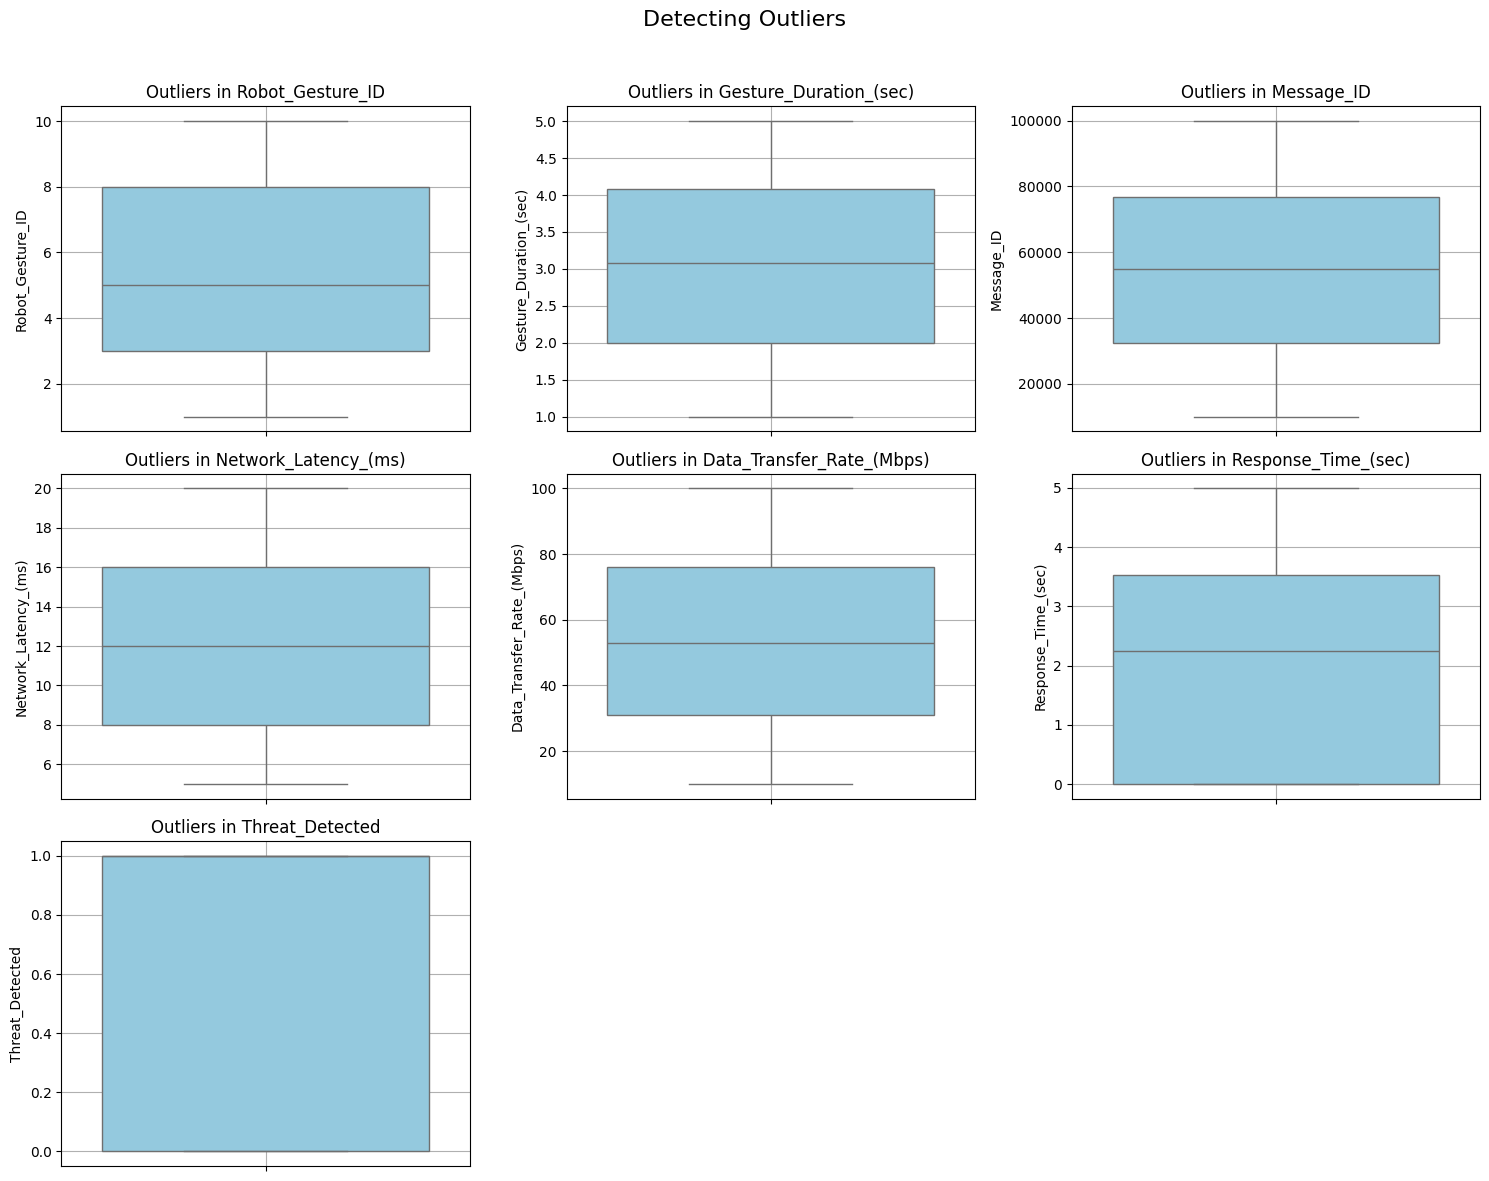

In [21]:
plot_outliers(dataset,"Detecting Outliers")

### No Outliers Found

# INSIGHTS
### 1. Robotic Gesture & Performance Analysis
### 2. Network & Encryption Insights
### 3. Cybersecurity Threat Analytics
### 4. Outlier Detection Insights (from boxplots)

# VISUAlIZATIONS

### 1.GESTURE FREQUENCY

In [22]:
fig1 = px.histogram(dataset, x='Gesture_Type', title='Gesture Frequency')
fig1.show()

### 2.Average Gesture Duration per Type

In [23]:
fig2 = px.box(dataset, x='Gesture_Type', y='Gesture_Duration_(sec)', title='Gesture Duration by Type')
fig2.show()

### 3.Gesture Duration vs. Response Time (sec)

In [24]:
fig3 = px.histogram(dataset, x='Response_Time_(sec)', y='Gesture_Duration_(sec)', title='Gesture Duration vs. Response_Time_(sec)', color='Robot_Status',barmode='group')
fig3.show()

### 4.Latency vs. Threat Detected

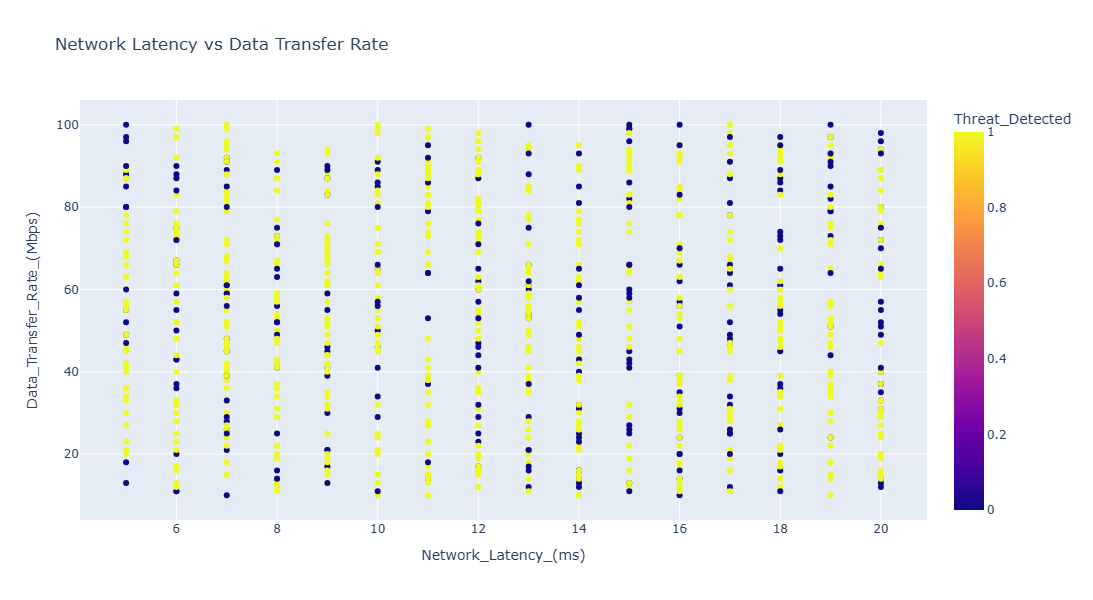

In [38]:
fig4 = px.scatter(dataset, x='Network_Latency_(ms)', y='Data_Transfer_Rate_(Mbps)',
                 color='Threat_Detected',
                 title='Network Latency vs Data Transfer Rate')
fig4.update_layout(width=1000,height=600)
fig4.show()

### 5.Encryption Algorithm Usage

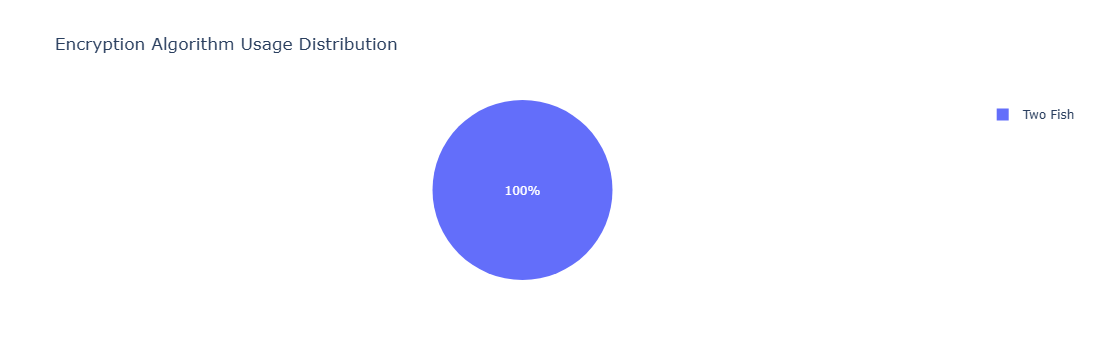

In [26]:
fig5 = px.pie(dataset, names='Encryption_Algorithm_Used',
             title='Encryption Algorithm Usage Distribution')
fig5.show()

### 6.Threat Type Frequency

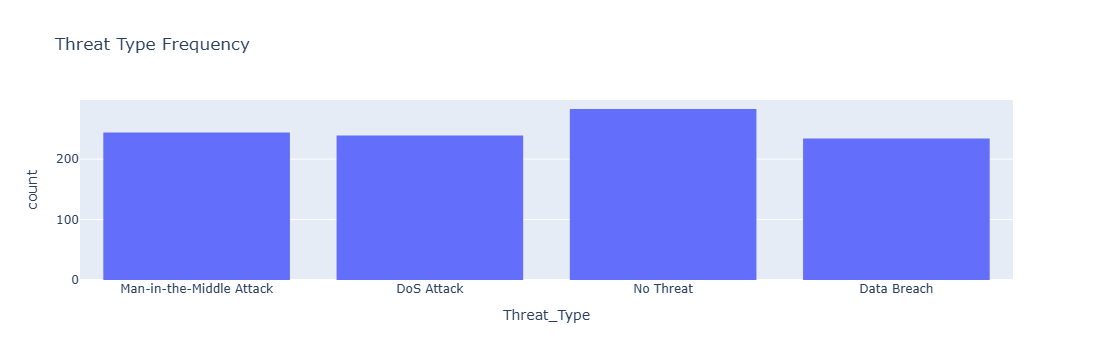

In [27]:
fig6 = px.histogram(dataset, x='Threat_Type', title='Threat Type Frequency')
fig6.show()

### 7.Threat Severity vs. Response Time

In [28]:
fig7 = px.violin(dataset, y='Response_Time_(sec)', x='Threat_Severity',
                box=True, points='all',
                title='Threat Severity vs Response Time')
fig7.show()

### 8.Response Actions Taken

In [29]:
fig8 = px.histogram(dataset, x='Response_Action_Taken', title='Response Actions Frequency')
fig8.show()

### 9.Threat Detected by Gesture Type

In [30]:
fig9 = px.sunburst(dataset, path=['Gesture_Type', 'Threat_Type'],
                  title='Threats Occurrence by Gesture Type')
fig9.update_layout(width=1000,height=500)
fig9.show()

### 10. Gesture Coordinates

In [31]:
    coords = dataset['Gesture_Coordinates_(x, y, z)'].str.extract(r'\((.*), (.*), (.*)\)')
    dataset[['x', 'y', 'z']] = coords.astype(float)
    
    fig10 = px.scatter_3d(dataset, x='x', y='y', z='z',
                        color='Gesture_Type',
                        title='3D Scatter Plot of Gesture Coordinates')
    fig10.update_layout(width=1000,height=600)
fig10.show()